In [83]:
import pandas as pd
import numpy as pn
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import plotly.express as px
from fredapi import Fred
pd.options.display.max_rows = 200
pd.options.display.max_columns = 500
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
fred_key = 'a3f6da98e2e0af2593d207fe3c18e10e'

In [3]:
fred = Fred(api_key=fred_key)

In [4]:
sp_search = fred.search('S&P', order_by='popularity')


In [5]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-08-20,2024-08-20,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-08-19,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-08-20 09:05:16-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-08-20,2024-08-20,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-05-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-07-30 08:11:01-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-08-20,2024-08-20,S&P 500,2014-08-20,2024-08-19,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-08-19 19:24:21-05:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-08-20,2024-08-20,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-08-20,2024-08-20,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-08-19,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-08-20 09:05:16-05:00,82,This data represents the effective yield of th...


<Axes: title={'center': 'S&P 500'}>

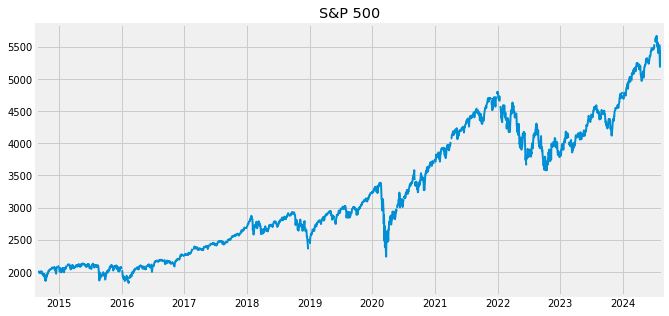

In [6]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title= 'S&P 500', lw=2)

In [ ]:
unmp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unmp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]


In [76]:
#joining data
all_results2 = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results2.append(results)
    
unmp_results = pd.concat(all_results2, axis=1)


In [78]:
#Dropping non-states data
cols_to_drop = []
for i in unmp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
unmp_results = unmp_results.drop(columns = cols_to_drop, axis=1)

In [81]:
unmp_states = unmp_results.copy() 
unmp_states = unmp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
unmp_states.columns = [id_to_state[c] for c in unmp_states.columns]

In [85]:
#Unemployment rate by state
px.line(unmp_states)

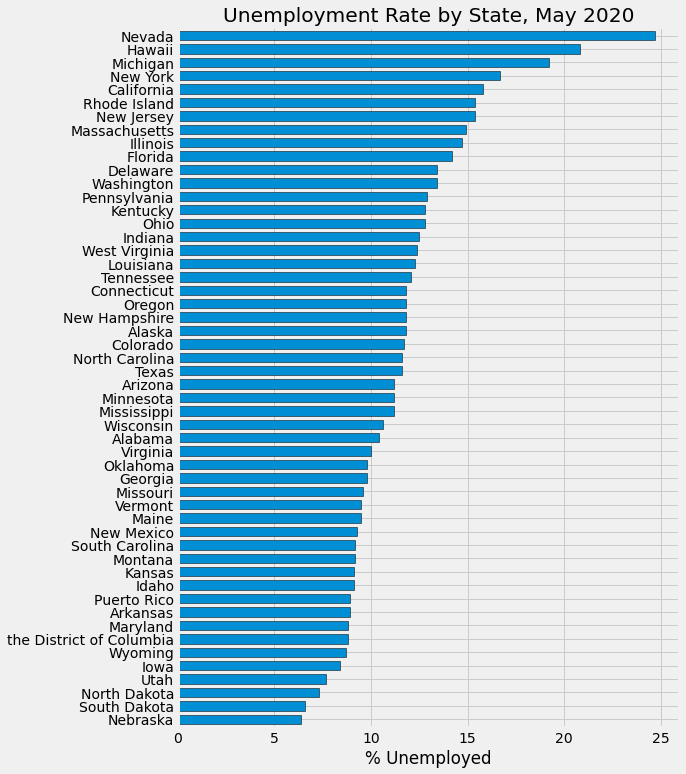

In [88]:
ax = unmp_states.loc[unmp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, May 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()